# Replicate and Improve the visualization

Accociated with the article [How to improve the visualization: a story with chart from medical paper](https://github.com/Lucifer-x/visualization-story-with-a-chart-from-medical-paper/blob/main/README.md).

## 1. Preparation

In [1]:
%matplotlib inline

### 1.1 Import packages which are needed

In [2]:
# Using in the replication
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Using in the improvement
from matplotlib.widgets import RadioButtons
from matplotlib.gridspec import GridSpec
from matplotlib.axes import Axes
from copy import deepcopy
from matplotlib import cm

### 1.2 Define constant

In [3]:
SIZE = (13,5)
PATH = 'data.csv'

### 1.3 Load Data

In [4]:
df = pd.read_csv(PATH,index_col=0)

## 2. Replication through matlibplot

### 2.1 Define the colors

In [5]:
colors = dict(zip(df.columns,map(lambda x: '#{}'.format(x),['4474c6','ee7d31','a5a5a5','fbc00a','e24e4e','6fac45','274279','9e480b','626262','957401','266090'])))

### 2.2 Initial the plot

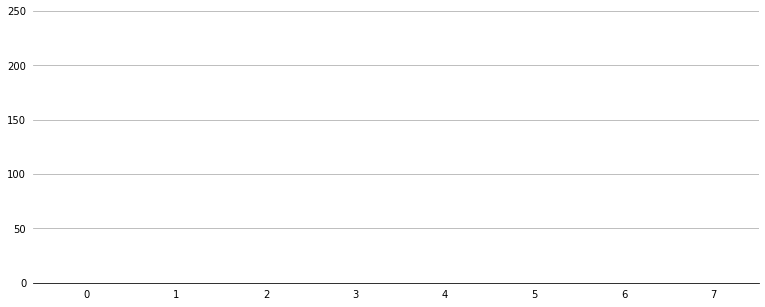

In [6]:
fig,ax = plt.subplots(figsize=(13,5))
# Show grids of the plot
ax.grid(axis="y")
# Make the boder of plot invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)
# Set the ticks of y-axis
ys = [0,50,100,150,200,250]
ax.set_yticks(ys)
ax.set_ylim(0,250)
# Set the tick of x-axis
xs = df.index
ax.set_xlim(-0.6,len(xs)-0.5)
ax.set_xticks(np.arange(len(xs)))
ax.set_xticklabels(xs,minor=True)
None

### 2.3 Draw the plot

In [7]:
heights = np.zeros(len(df.index))
# Reorder the columns of data
cols = ['hematopoietic system disease','immune system disease','arterial pressure nos decreased','dizziness','respiratory system disease', 'cancer','integumentary system disease','urinary system disease','headache','cardiovascular system disease','viral infectious disease']
# Draw the stacked bar plot
for y in cols:
    ax.bar(df[y].index,df[y].values,bottom=heights,color=colors[y],width=0.5,label=y)
    heights += df[y].values
# Draw the legend of plot
ax.legend(loc='lower center',ncol=4,frameon=False,bbox_to_anchor=(0.5,-0.3),handlelength=0.5)
None

### 2.4 Show the result

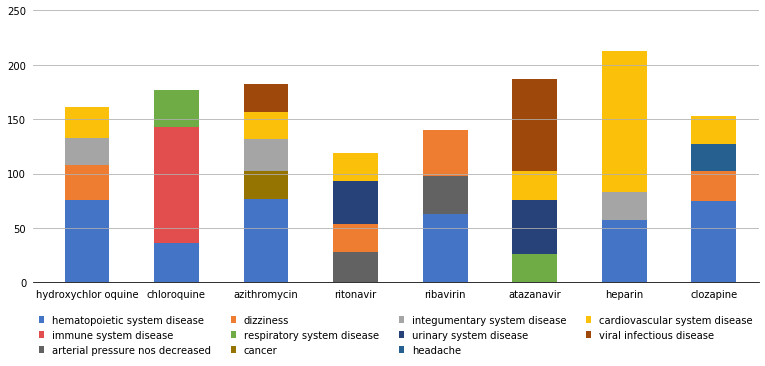

In [8]:
fig

## 3. Improvement

### 3.1 Preparation

In [9]:
%matplotlib notebook
%matplotlib notebook

In [10]:
from components import SelectionBox,SelectionPlot

### 3.2 Creating module

We have created a module _components.py_ to realize the creation of the visualization. The module file concludes two classes and the code is shown below:

#### 3.2.1 SelectionBox

```python
class SelectionBox(RadioButtons):
    """
    This is a custom class inherited from the "matplotlib.widgets.RadioButtons".

    For the buttons to remain responsive you must keep a reference to this
    object.

    Connect to the SelectionBox with the `.on_clicked` method.

    Attributes
    ----------
    ax : `matplotlib.axes.Axes`
        The parent axes for the widget.
    activecolor : color
        The color of the selected button.
    labels : list of `.Text`
        The button labels.
    circles : list of `~.patches.Circle`
        The buttons.
    value_selected : str
        The label text of the currently selected button.
    """

    def __init__(self, ax: Axes, **params):
        """
        Add selection box an `matplotlib.axes.Axes`.

        Parameters
        ----------
        ax : `matplotlib.axes.Axes`
            The axes to add the buttons to.
        labels : list of str
            The button labels.
        active : int
            The index of the initially selected button.
        activecolor : color
            The color of the selected button.
        """
        self.ax = ax
        self.ax.clear()
        for spine in self.ax.spines:
            self.ax.spines[spine].set_visible(False)
        self.ax.set(aspect='equal')
        super().__init__(ax, **params)

    def set_buttons(self, radius: float = 0.02, offset: float = 0.06, circleprops: dict = None, textprops: dict = None):
        """
        Set the style of buttons.

        Parameters
        ----------
        radius: float
            The radius of buttons.
        offset: float
            The offset between bottom and labels.
        circleprops : dict, optional
            The properties of the style of each button's circle.
        textprops : dict, optional
            The properties of the style of each button's label.
        """
        if circleprops is None:
            circleprops = {}
        if textprops is None:
            textprops = {}
        for circle, label in zip(self.circles, self.labels):
            x, y = circle.get_center()
            circle.set_radius(radius)
            circle.set_center((x + offset, y))
            circle.set(**circleprops)
            label.set(**textprops)
```

#### 3.2.2 SelectionBox

```python
class SelectionPlot:
    """
    This is a custom class which is to create bar charts and pie charts
    according to the options of ratio buttons.

    Reffered to the options selected by the user, the class create the plot
    based on the corresponding data.

    Attributes
    ----------
    ax : `matplotlib.axes.Axes`
        The parent axes for the plot.
    """

    def __init__(self, ax: Axes,
                 labels: pd.Series,
                 data: pd.DataFrame,
                 is_pie: bool = True,
                 title: str = '{}',
                 font_dicts: dict = None,
                 **params):
        """

        Parameters
        ----------
        ax : `matplotlib.axes.Axes`
            The axes to add the plot to.
        labels : `pd.Series`
            The label of plot.
        data : `pd.DataFrame`
            The data of plot.
        is_pie : bool
            If true, draw the pie plot, else draw the bar plot.
        title : str
            Title of plot.
        font_dicts: dict
            The dictionary of font style.
            ==========   ======================================================
            Key          Description
            ==========   ======================================================
            global      The style of all the fonts
            title       The style of title
            label       The style of label
            value       The style of value
            ==========   ======================================================
        **params :
            The parameters of the plot.
        """
        if not font_dicts:
            font_dicts = {'global': {'family': 'Times New Roman'},
                          'title': {'weight': 'black', 'size': 14},
                          'label': {},
                          'value': {}}
        self.ax = ax
        self.__labels = labels
        self.__data = data
        self.__is_pie = is_pie
        self.__title = title
        self.__params = params
        self.__font_dicts = font_dicts
        self.__rc = rc('font', **self.__font_dicts['global'])
        self.__init_plot()

    def __init_plot(self):
        """
        Initialize the plot, setting x_axis if the type of graph is bar chart.
        """
        # Make the border of plot invisible
        for position in self.ax.spines:
            if not self.__is_pie and position == "bottom":
                continue
            self.ax.spines[position].set_visible(False)
        # Init the plot
        self.draw('all')

    def draw(self, value):
        """
        Creating corresponding plot based on the option of the radio button.

        Parameters
        ----------
        value : str
            The label text of the currently selected button.
        """
        self.ax.clear()
        self.ax.set_title(self.__title.format(value + ' drugs' if value == 'all' else value),
                          fontdict=self.__font_dicts['title'])

        # Draw the pie plot
        if self.__is_pie:
            # Set y-axis
            self.ax.set_yticks([])
            pctdistance = 1.09 if value == 'all' else 0.6
            labeldistance = 1.2 if value == 'all' else 1.1
            pie = self.ax.pie(x=self.__data.loc[value][self.__data.loc[value] != 0],
                              labels=self.__data.loc[value][self.__data.loc[value] != 0].index,
                              autopct='%1.0f%%',
                              pctdistance=pctdistance,
                              labeldistance=labeldistance,
                              **self.__params)
            for label, value in zip(pie[1], pie[2]):
                label.set(**self.__font_dicts['label'])
                value.set(**self.__font_dicts['value'])

        # Draw the bar plot
        else:
            # Set y-axis
            max_value = max(self.__data[filter(lambda x: x != 'all', self.__data.columns)].max()) \
                if value != 'all' \
                else max(self.__data[value])
            self.ax.set_ylim(0, max_value * 1.1)
            # Set x-axis
            self.ax.set_xlim(-0.6, len(self.__labels) - 0.5)
            self.ax.tick_params(bottom=False, top=False, left=False, right=False)
            self.ax.set_xticklabels(self.__labels,
                                    fontdict=self.__font_dicts['label'])
            # Draw the bar plot
            rects = self.ax.bar(x=self.__labels,
                                height=self.__data[value],
                                **self.__params)
            # Add value on the top of each bar
            for rect in rects:
                height = rect.get_height()
                if height:
                    self.ax.annotate('{}'.format(height),
                                     xy=(rect.get_x() + rect.get_width() / 2, height),
                                     xytext=(0, 1),
                                     textcoords="offset points",
                                     ha='center',
                                     va='bottom',
                                     **self.__font_dicts['value'])
        return self.ax
```

### 3.3 Reformat data

In [11]:
pie_data = deepcopy(df)
sum_ = df.sum(axis=0)
sum_.name = 'all'
pie_data = pie_data.append(sum_)
pie_labels = pie_data.index
bar_data = deepcopy(df)
bar_data['all'] = df.sum(axis=1)
bar_labels = bar_data.index

### 3.4 Draw the plot

<IPython.core.display.Javascript object>


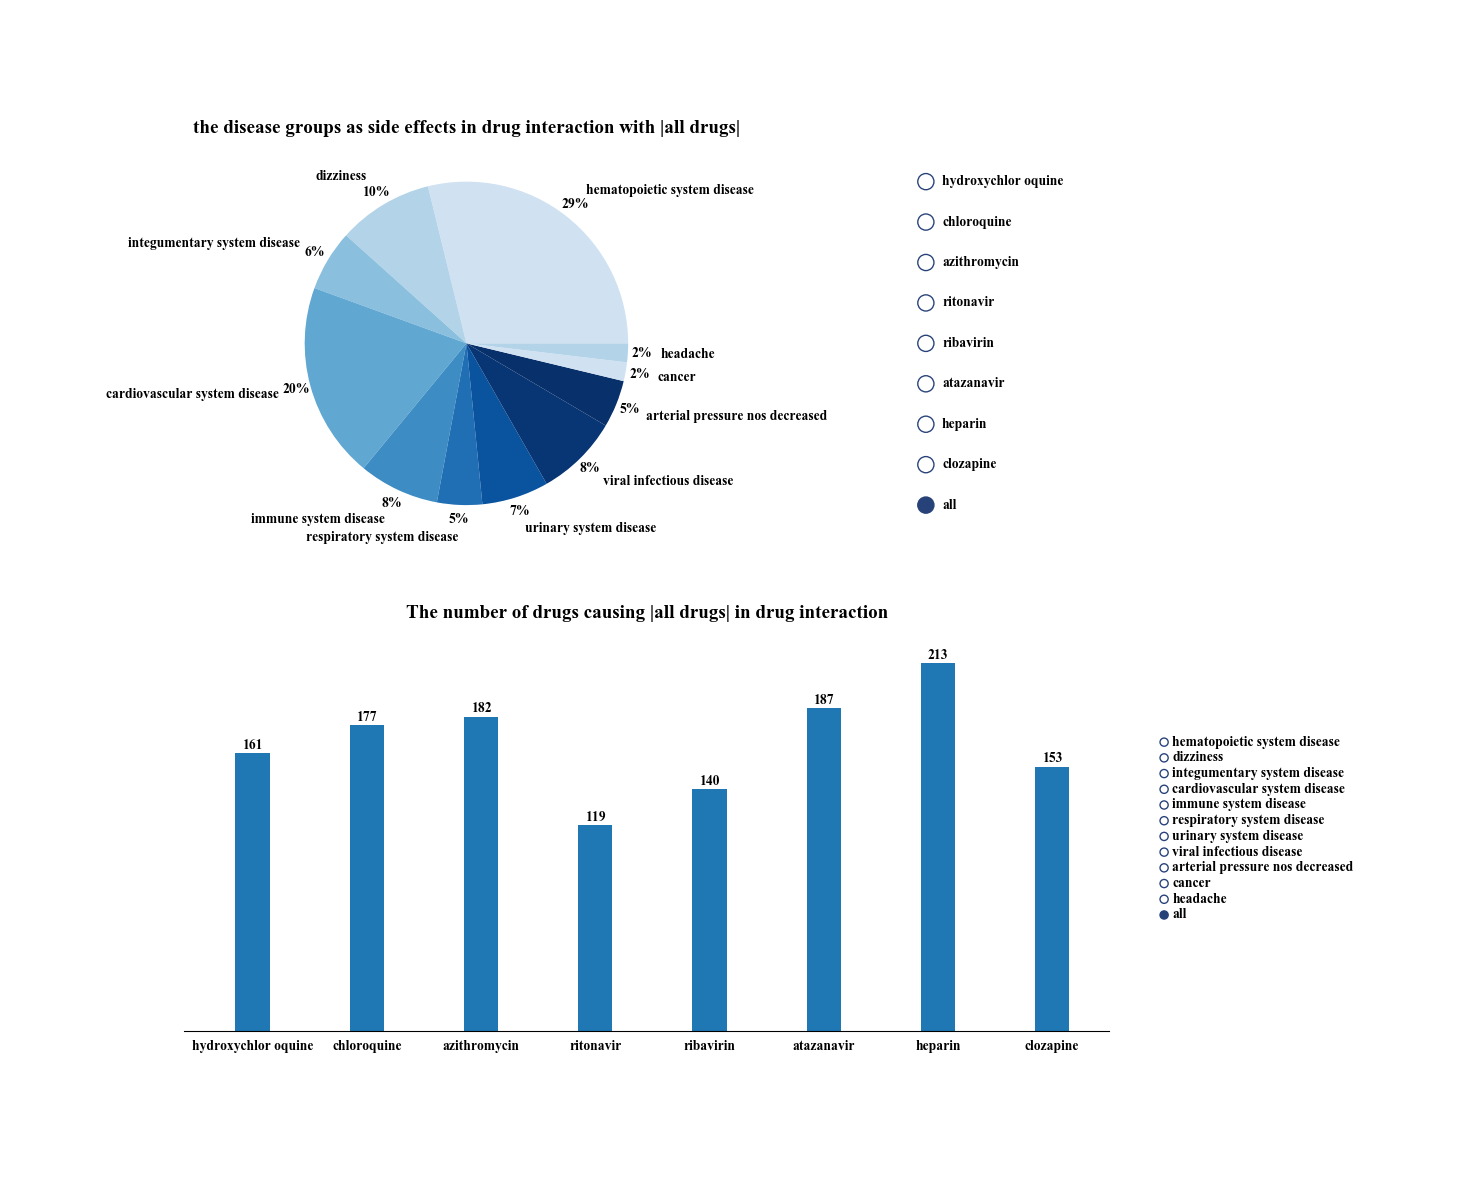

0

In [12]:
# Initial the plot 
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(2, 16, figure=fig)
# Distribute the subplots
pie_ax = fig.add_subplot(gs[0, :8])
pie_select_ax = fig.add_subplot(gs[0, -8:])
bar_ax = fig.add_subplot(gs[1, :-3])
bar_select_ax = fig.add_subplot(gs[1, -3:])

# Draw the pie plot
pie_props = {
    'ax': pie_ax,
    'labels': pie_labels,
    'data': pie_data,
    'is_pie': True,
    'title': "the disease groups as side effects in drug interaction with |{}|",
    'font_dicts': None,
    'colors': cm.Blues(np.arange(len(pie_labels)) / len(pie_labels) + 0.2)
}
pie = SelectionPlot(**pie_props)
pie_sb = SelectionBox(ax=pie_select_ax,
                      labels=pie_data.index,
                      active=len(pie_data.index) - 1,
                      activecolor='#274279')
pie_sb.set_buttons(circleprops={'fc': 'white', 'ec': '#274279'})
pie_sb.on_clicked(pie.draw)

# Draw the bar plot
bar_props = {
    'ax': bar_ax,
    'labels': bar_labels,
    'data': bar_data,
    'is_pie': False,
    'title': "The number of drugs causing |{}| in drug interaction",
    'font_dicts': None,
    'width': 0.3
}
bar = SelectionPlot(**bar_props)
bar_sb = SelectionBox(ax=bar_select_ax,
                      labels=bar_data.columns,
                      active=len(bar_data.columns) - 1,
                      activecolor='#274279')
bar_sb.set_buttons(circleprops={'fc': 'white', 'ec': '#274279'})
bar_sb.on_clicked(bar.draw)